# Data Preprocessing and Undersampling

This notebook demonstrates the process of reading a CSV file, preprocessing its headers, filtering the data, and applying undersampling to balance the dataset. This is particularly useful in machine learning tasks where class imbalance could bias the model training.

## Features:
- Preprocess CSV headers to remove unwanted characters.
- Read the CSV data into a pandas DataFrame.
- Filter the data by removing specific columns and rows with missing values.
- Apply undersampling to balance the dataset.
- Visualize the distribution of classes before and after undersampling.
- Save the processed data to a new CSV file.

## Setup and Imports

Before running this notebook, ensure you have installed the necessary Python packages required for your specific environment.

In [1]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

/tmp/ipykernel_36986/2621320205.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Configuration

Specify the path to the CSV file and other relevant settings here.


In [7]:
CSV_FILENAME = input()  # Adjust the path to your CSV file

 annotated.csv


## Data Loading and Preprocessing

Load the CSV data with the corrected headers and perform initial data filtering.

In [8]:
try:
    csv = pd.read_csv(CSV_FILENAME, lineterminator='\n')
except FileNotFoundError:
    print("ERROR: File not found")
    exit(1)

print(csv)

                                         submission_name  \
0                      Weekly help thread - Oct 30, 2023   
1                      Weekly help thread - Oct 30, 2023   
2                      Weekly help thread - Oct 30, 2023   
3                      Weekly help thread - Oct 30, 2023   
4      Why Filipinos are bound to become the poorest ...   
...                                                  ...   
17899  TIL Tito Sotto requested the Inquirer to remov...   
17900  TIL Tito Sotto requested the Inquirer to remov...   
17901  TIL Tito Sotto requested the Inquirer to remov...   
17902  TIL Tito Sotto requested the Inquirer to remov...   
17903  TIL Tito Sotto requested the Inquirer to remov...   

                                         submission_text  \
0      Need help on something? Whether it's about hea...   
1      Need help on something? Whether it's about hea...   
2      Need help on something? Whether it's about hea...   
3      Need help on something? Whether 

In [9]:
# Drop submission-related columns
csv = csv.drop(columns=[
    'submission_name',
    'submission_text',
    '\r',   # Windows may append \r and it becomes considered
            # as its own column. This prevents that
], errors='ignore')
print(csv)

                                                    body label Unnamed: 4  \
0      Question in regards to Barangay voting\nMga lo...     0          0   
1      Alin-aling LRT 1 stations ang madalas may avai...     0          0   
2            Hindi, kung bumoto ka naman nung isang taon     0          0   
3      may nakita ako na 2 consecutive elections. kal...     0          0   
4      Maraming products na noon ay locally made sa P...     1          1   
...                                                  ...   ...        ...   
17899  Ano kaya nararamdaman nila hanggang sa pagtand...   NaN        NaN   
17900  Lost media material yung apology, sana may nak...   NaN        NaN   
17901                                               Bruh   NaN        NaN   
17902  Si vic lang yung lumuhod sa pagkakatanda ko at...   NaN        NaN   
17903  Dami jan sa tabi-tabi masyado pa-affect sa isa...   NaN        NaN   

      Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 

In [10]:
# Drop all rows whose labels are not 0 or 1
csv = pd.concat([
    csv[csv['label'] == '0'], 
    csv[csv['label'] == '1'],
])

print(csv)

                                                   body label Unnamed: 4  \
0     Question in regards to Barangay voting\nMga lo...     0          0   
1     Alin-aling LRT 1 stations ang madalas may avai...     0          0   
2           Hindi, kung bumoto ka naman nung isang taon     0          0   
3     may nakita ako na 2 consecutive elections. kal...     0          0   
8        Apply na ng passport at visa para makaalis na!     0          0   
...                                                 ...   ...        ...   
2673                               Hay nako PACQ talaga     1          1   
2674  Tsk tsk smni news?! Mgananlilimos tapos sa mga...     1          1   
2675  These cults are a disgrace to all Filipinos.\n...     1          1   
2677  Nakakahiya sila. Nakakahiya pati sa mga workin...     1          1   
2682  Quiboloy Worldwide! Tabla sa akin mga ganyan d...     1          1   

     Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  \
0      

In [11]:
# Drop all columns with no header
# Prevents errors from having other unnecessary data in other columns
# It selects the values of columns whose header does not
# begin with 'Unnamed'
csv = csv.loc[:, ~csv.columns.str.contains('^Unnamed')]

print(csv)

                                                   body label
0     Question in regards to Barangay voting\nMga lo...     0
1     Alin-aling LRT 1 stations ang madalas may avai...     0
2           Hindi, kung bumoto ka naman nung isang taon     0
3     may nakita ako na 2 consecutive elections. kal...     0
8        Apply na ng passport at visa para makaalis na!     0
...                                                 ...   ...
2673                               Hay nako PACQ talaga     1
2674  Tsk tsk smni news?! Mgananlilimos tapos sa mga...     1
2675  These cults are a disgrace to all Filipinos.\n...     1
2677  Nakakahiya sila. Nakakahiya pati sa mga workin...     1
2682  Quiboloy Worldwide! Tabla sa akin mga ganyan d...     1

[2609 rows x 2 columns]


In [15]:
# Extract X and y from the csv, this allows the data to be
# undersampled
X = csv.iloc[:, 0]
y = csv.iloc[:, 1]

print(X)
print("-----")
print(y)

0       Question in regards to Barangay voting\nMga lo...
1       Alin-aling LRT 1 stations ang madalas may avai...
2             Hindi, kung bumoto ka naman nung isang taon
3       may nakita ako na 2 consecutive elections. kal...
8          Apply na ng passport at visa para makaalis na!
                              ...                        
2673                                 Hay nako PACQ talaga
2674    Tsk tsk smni news?! Mgananlilimos tapos sa mga...
2675    These cults are a disgrace to all Filipinos.\n...
2677    Nakakahiya sila. Nakakahiya pati sa mga workin...
2682    Quiboloy Worldwide! Tabla sa akin mga ganyan d...
Name: body, Length: 2609, dtype: object
-----
0       0
1       0
2       0
3       0
8       0
       ..
2673    1
2674    1
2675    1
2677    1
2682    1
Name: label, Length: 2609, dtype: object


In [16]:
# Reshape X into a 2D array to be compatible with the undersampler
X = X.values.reshape(-1, 1)

print(X)

[['Question in regards to Barangay voting\nMga lods newbie sa ganitong topic here..may ask lang ako regarding sa botohan mamaya sa Barangay. Paano po pag 1 beses di po ako maka boto mamaya mawawala ba agad ako sa listahan ng susunod na botohan? Salamat po sa sasagot.']
 ['Alin-aling LRT 1 stations ang madalas may available stored value card (SVC) i.e. Beep card sa mga tvms nila? Sa Vito Cruz at Quirino kasi palaging naka-ekis yung option para kumuah ng svc e, single-journey ticket lang palagi available...']
 ['Hindi, kung bumoto ka naman nung isang taon']
 ...
 ['These cults are a disgrace to all Filipinos.\nINC \nPMCC4thwatch\netc. \nnakakasuka']
 ['Nakakahiya sila. Nakakahiya pati sa mga working students na pilipino overseas na nag do doble pa ng effort sa trabaho. Sana nag sikap na lang sila. NAKAKAHIYA.']
 ['Quiboloy Worldwide! Tabla sa akin mga ganyan dito overseas. Plus the 10 dollar kakanin na single bite. Di nil akasalanan pero malas talag sila pag natapat sila sa akin, bibigya

## Undersampling

Apply undersampling to balance the dataset, focusing on the distribution of the 'label' column.

In [17]:
sampler = RandomUnderSampler(random_state=42)

In [18]:
# Undersample the data
try:
    X_resampled, y_resampled = sampler.fit_resample(X, y)
except ValueError:
    print("ERROR: Insufficient data")
    exit()

print(X_resampled)
print("-----")
print(y_resampled)

[['Whaat? Para sa Barangay election?\nGanyan kalaki ang bigayan?']
 ['Ever since na mapansin ko difference in taste ng Chicken Joy ng Jollibee, I switched to McDo and very consistent sila, imo. Good thing, dumadami na branch ni McDo rito samin, iisa nga lang malapit.']
 ["Lahat yata ng tv show nung 90's pumatok. Walang naging baduy sa kin dati. Ultimo commercials ok din."]
 ['tinataboy aftwr 5 mins babalik pag naging forceful ka baka mag amok naman sila talo dun']
 ['Hindi naman automatic malalagas approval ni Fiona. But it will be. Lalo na kung talagang di titigil sa pagiging simp sa China ang pamilyang yan.']
 ["they escape from shelters where they are housed. pwede sila bigyan ng livelihood program or balik probinsya na tutulungan din sana ng LGU kung saan sila uuwi, but since they're used to receiving money by just begging, they rather find a way to escape. the govt cannot force them to stay kasi di naman sila bilanggo. kaya may anti-mendicancy law kasi these beggars will keep goin

In [19]:
# Flatten X again after resampling so it returns to
# a 1D list
X_resampled = X_resampled.flatten()

print(X_resampled)

['Whaat? Para sa Barangay election?\nGanyan kalaki ang bigayan?'
 'Ever since na mapansin ko difference in taste ng Chicken Joy ng Jollibee, I switched to McDo and very consistent sila, imo. Good thing, dumadami na branch ni McDo rito samin, iisa nga lang malapit.'
 "Lahat yata ng tv show nung 90's pumatok. Walang naging baduy sa kin dati. Ultimo commercials ok din."
 'tinataboy aftwr 5 mins babalik pag naging forceful ka baka mag amok naman sila talo dun'
 'Hindi naman automatic malalagas approval ni Fiona. But it will be. Lalo na kung talagang di titigil sa pagiging simp sa China ang pamilyang yan.'
 "they escape from shelters where they are housed. pwede sila bigyan ng livelihood program or balik probinsya na tutulungan din sana ng LGU kung saan sila uuwi, but since they're used to receiving money by just begging, they rather find a way to escape. the govt cannot force them to stay kasi di naman sila bilanggo. kaya may anti-mendicancy law kasi these beggars will keep going back to t

In [20]:
# Make a new dataframe with the resampled data
# These columns have the same name as the 
# 2016 and 2022 PH Hate Speech dataset
final_csv = pd.DataFrame(
    list(zip(X_resampled, y_resampled)),
    columns=['text', 'label']
)

print(final_csv)

                                                  text label
0    Whaat? Para sa Barangay election?\nGanyan kala...     0
1    Ever since na mapansin ko difference in taste ...     0
2    Lahat yata ng tv show nung 90's pumatok. Walan...     0
3    tinataboy aftwr 5 mins babalik pag naging forc...     0
4    Hindi naman automatic malalagas approval ni Fi...     0
..                                                 ...   ...
935                               Hay nako PACQ talaga     1
936  Tsk tsk smni news?! Mgananlilimos tapos sa mga...     1
937  These cults are a disgrace to all Filipinos.\n...     1
938  Nakakahiya sila. Nakakahiya pati sa mga workin...     1
939  Quiboloy Worldwide! Tabla sa akin mga ganyan d...     1

[940 rows x 2 columns]


## Save Processed Data

Save the undersampled dataset to a new CSV file.

In [21]:
final_filename = CSV_FILENAME.replace('.csv', '-final.csv')
final_csv.to_csv(final_filename, index=False)
print(f"Processed data saved to {final_filename}")

Processed data saved to annotated-final.csv


## Visualization

Visualize the class distribution before and after undersampling to understand the effect.


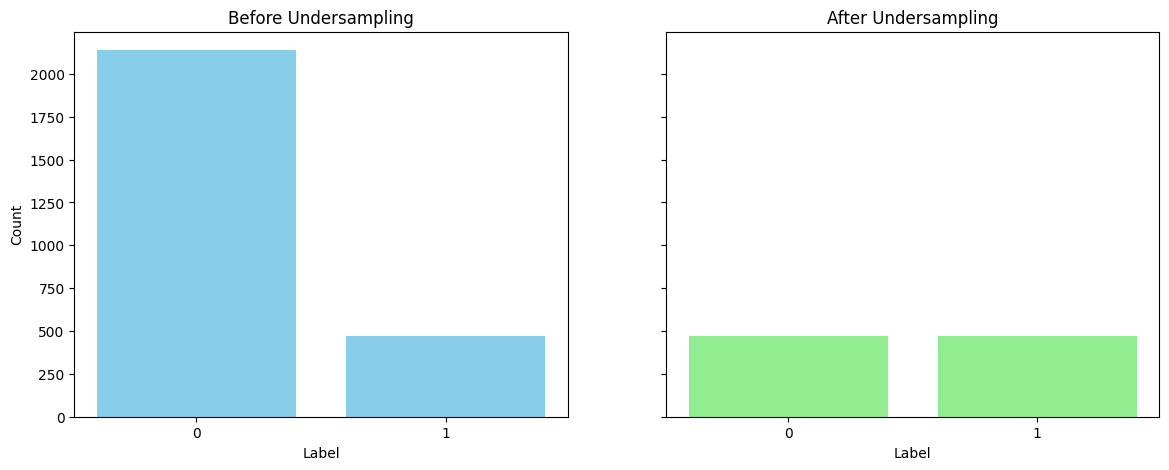

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Before undersampling
axs[0].bar(csv['label'].value_counts().index, csv['label'].value_counts().values, color='skyblue')
axs[0].set_title('Before Undersampling')
axs[0].set_xlabel('Label')
axs[0].set_ylabel('Count')

# After undersampling
axs[1].bar(final_csv['label'].value_counts().index, final_csv['label'].value_counts().values, color='lightgreen')
axs[1].set_title('After Undersampling')
axs[1].set_xlabel('Label')

plt.show()